In [2]:
from collections import Counter

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import gridspec
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split

def remove_outliers(df, times):
  for _ in range(times):
    df = df[(np.abs(zscore(df)) < 3).all(axis=1)]
  return df

In [3]:
df = pd.read_csv('../data/anomalies/creditcardfraud/creditcard.csv')[['Class', 'V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V15', 'V17', 'V18']]

In [4]:
df_train, df_test = train_test_split(df, test_size=0.5, shuffle=True)
df_test, df_validation = train_test_split(df_test, test_size=0.5, shuffle=True)
df_train: pd.DataFrame
df_test: pd.DataFrame
df_validation: pd.DataFrame

In [101]:
label_col = 'Class'
x = df.drop([label_col], axis=1)
y = df[[label_col]]
pca = PCA()
x = pca.fit_transform(x)
x_train = pca.transform(df_train.drop([label_col], axis=1))
y_train = df_train[[label_col]]
x_test = pca.transform(df_test.drop([label_col], axis=1))
y_test = df_test[[label_col]]
x_validation = pca.transform(df_validation.drop([label_col], axis=1))
y_validation = df_validation[[label_col]]

In [102]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [103]:
y_test_pred: np.ndarray = model.predict(x_test)
y_validation_pred: np.ndarray = model.predict(x_validation)
y_train_pred: np.ndarray = model.predict(x_train)
y_pred: np.ndarray = model.predict(x)

In [104]:
print('Accuracy :', accuracy_score(y_train, y_train_pred))
print('Confusion matrix :\n', confusion_matrix(y_train, y_train_pred))
print('Recall score :', recall_score(y_train, y_train_pred))
print(Counter(y_train_pred))

Accuracy : 1.0
Confusion matrix :
 [[142149      0]
 [     0    254]]
Recall score : 1.0
Counter({0: 142149, 1: 254})


In [105]:
print('Accuracy :', accuracy_score(y_test, y_test_pred))
print('Confusion matrix :\n', confusion_matrix(y_test, y_test_pred))
print('Recall score :', recall_score(y_test, y_test_pred))
print(Counter(y_test_pred))

Accuracy : 0.9994803516755147
Confusion matrix :
 [[71073     9]
 [   28    92]]
Recall score : 0.7666666666666667
Counter({0: 71101, 1: 101})


In [106]:
print('Accuracy :', accuracy_score(y_validation, y_validation_pred))
print('Confusion matrix :\n', confusion_matrix(y_validation, y_validation_pred))
print('Recall score :', recall_score(y_validation, y_validation_pred))
print(Counter(y_validation_pred))

Accuracy : 0.9995786635206876
Confusion matrix :
 [[71080     4]
 [   26    92]]
Recall score : 0.7796610169491526
Counter({0: 71106, 1: 96})


In [107]:
print('Accuracy :', accuracy_score(y, y_pred))
print('Confusion matrix :\n', confusion_matrix(y, y_pred))
print('Recall score :', recall_score(y, y_pred))
print(Counter(y_pred))

Accuracy : 0.999764752973066
Confusion matrix :
 [[284302     13]
 [    54    438]]
Recall score : 0.8902439024390244
Counter({0: 284356, 1: 451})


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

IndexError: index 28 is out of bounds for GridSpec with size 28

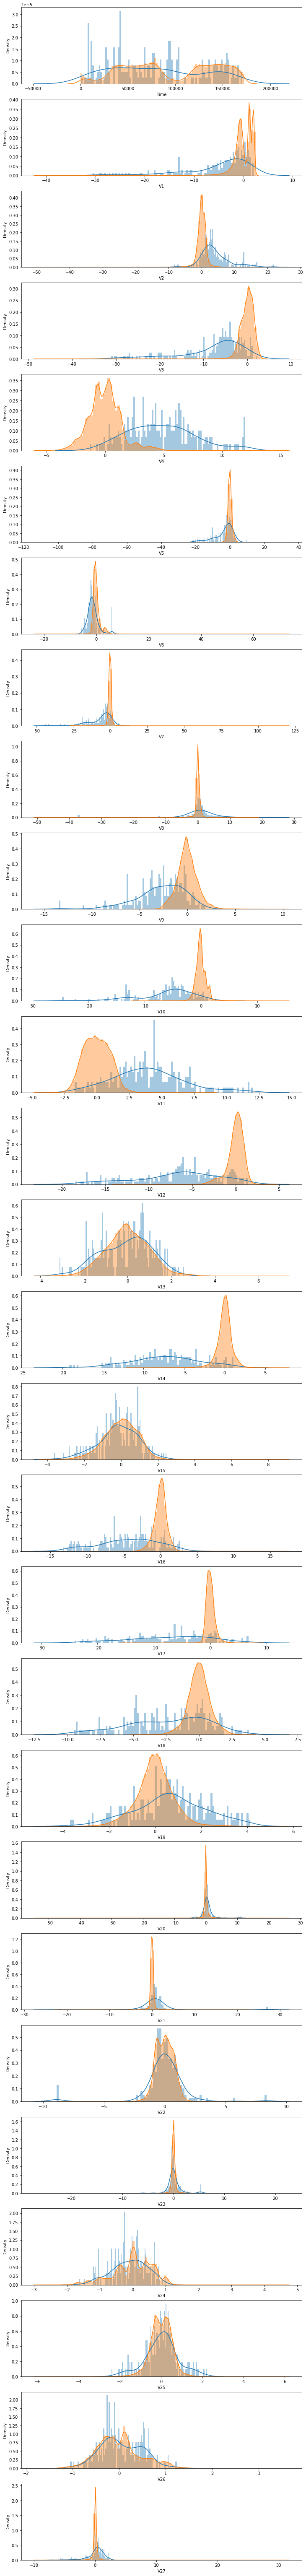

In [60]:
v_features = [column for column in df_train]
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28,1)
for i, cn in enumerate(df_train[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df_train[cn][df_train.Class == 1], bins = 100)
    sns.distplot(df_train[cn][df_train.Class == 0], bins = 100)